# Exercise 3-1: Create some plots

In [1]:
import pandas as pd

## Get the data

In [2]:
mortality_data = pd.read_pickle('mortality_prepped.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate,MeanCentered
0,1900,01-04 Years,1983.8,1790.87584
1,1901,01-04 Years,1695.0,1502.07584
2,1902,01-04 Years,1655.7,1462.77584
3,1903,01-04 Years,1542.1,1349.17584
4,1904,01-04 Years,1591.5,1398.57584


In [3]:
mortality_wide = pd.read_pickle('mortality_wide.pkl')
mortality_wide.head()

AgeGroup,01-04 Years,05-09 Years,10-14 Years,15-19 Years
Year,,,,
1900,1983.8,466.1,298.3,484.8
1901,1695.0,427.6,273.6,454.4
1902,1655.7,403.3,252.5,421.5
1903,1542.1,414.7,268.2,434.1
1904,1591.5,425.0,305.2,471.4


## Visualize the data

<AxesSubplot:xlabel='Year', ylabel='DeathRate'>

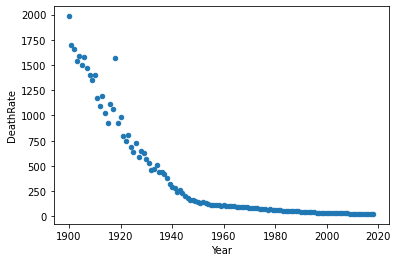

In [4]:
mortality_data.query('AgeGroup == "01-04 Years"').plot.scatter(x='Year', y='DeathRate')

<AxesSubplot:xlabel='Year'>

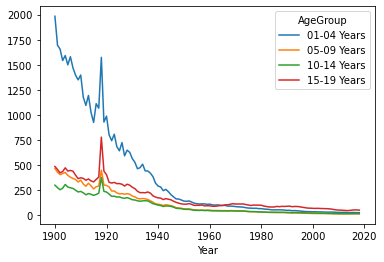

In [5]:
mortality_wide.plot()

<AxesSubplot:title={'center':'Child Mortality: 15-19 Years'}, xlabel='Year'>

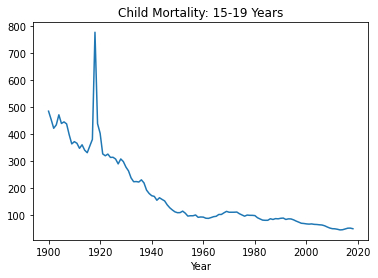

In [6]:
mortality_wide.plot.line(y='15-19 Years', title='Child Mortality: 15-19 Years', legend=False)

<AxesSubplot:xlabel='Year'>

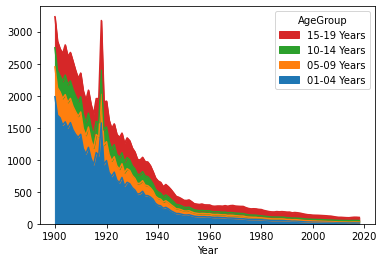

In [7]:
mortality_wide.plot.area(legend='reverse')

<AxesSubplot:title={'center':'Child Mortality: 2000'}>

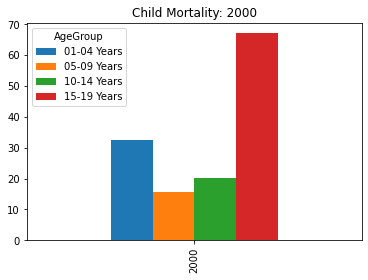

In [8]:
mortality_wide.query('Year == 2000') \
    .plot.bar(title='Child Mortality: 2000', xlabel="")

<AxesSubplot:title={'center':'Child Mortality: 2000'}, xlabel='AgeGroup'>

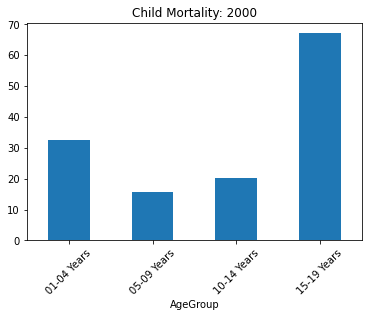

In [9]:
mortality_data.query('Year == 2000') \
    .pivot(index='AgeGroup', columns='Year', values='DeathRate') \
    .plot.bar(title='Child Mortality: 2000', legend=False, rot=45)

<AxesSubplot:ylabel='Frequency'>

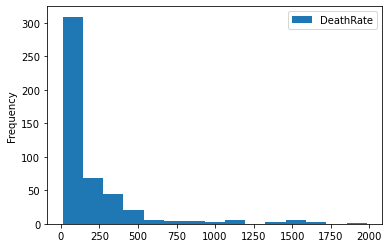

In [10]:
mortality_data.plot.hist(y='DeathRate', bins=15)

<AxesSubplot:title={'center':'Child Mortality Density: 1900'}, ylabel='Density'>

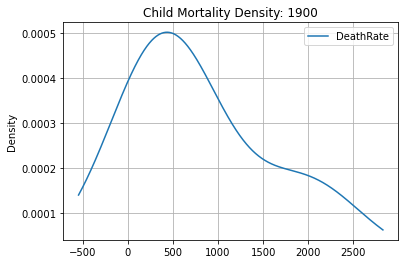

In [11]:
mortality_data.query('Year==1900') \
    .plot.density(y='DeathRate', grid=True, title='Child Mortality Density: 1900')

<AxesSubplot:ylabel='DeathRate'>

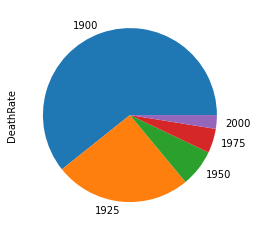

In [12]:
mortality_data.query('Year in (1900, 1925, 1950, 1975, 2000)') \
    .groupby('Year').DeathRate.sum().plot.pie()

array([[<AxesSubplot:title={'center':'Child Mortality: 01-04'}, ylabel='Year'>,
        <AxesSubplot:title={'center':'Child Mortality: 05-09'}, ylabel='Year'>],
       [<AxesSubplot:title={'center':'Child Mortality: 10-14'}, ylabel='Year'>,
        <AxesSubplot:title={'center':'Child Mortality: 15-19'}, ylabel='Year'>]],
      dtype=object)

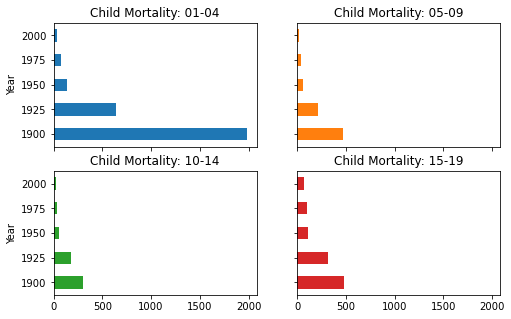

In [13]:
mortality_wide.query('Year in (1900, 1925, 1950, 1975, 2000)').plot.barh(
    title=['Child Mortality: 01-04', 'Child Mortality: 05-09',
           'Child Mortality: 10-14', 'Child Mortality: 15-19'],
    sharey=True, legend=False, subplots=True, layout=(2, 2), figsize=(8,5))